In [3]:
import matplotlib as mpl
import torch
import warnings
import matplotlib
import matplotlib.pyplot as plt
from sys import platform
# from datasets.datasets import ExtremeBimodalDataGenerator, SmoothBimodalDataGenerator
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
mpl.rcParams["legend.framealpha"] = 1
matplotlib.rc('font', **{'size': 15})
import seaborn as sns
%load_ext autoreload
%autoreload 2

device_name = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device = torch.device(device_name)


In [5]:
polyps_noise_type_map = {
    'uniform': 'independent',
    'nonuniform': 'dependent',
    'nonuniform2': 'non uniform'
}
coco_noise_type_map = {
    'independent_even': 'independent even',
    'independent_even': 'independent even',
    
    'dependent': 'dependent',
    'partial': 'partial',
    
}

# POLYPS

FileNotFoundError: [Errno 2] No such file or directory: 'coco/results/0_05_500_1500_0_1_independent_False_dataframe.csv'

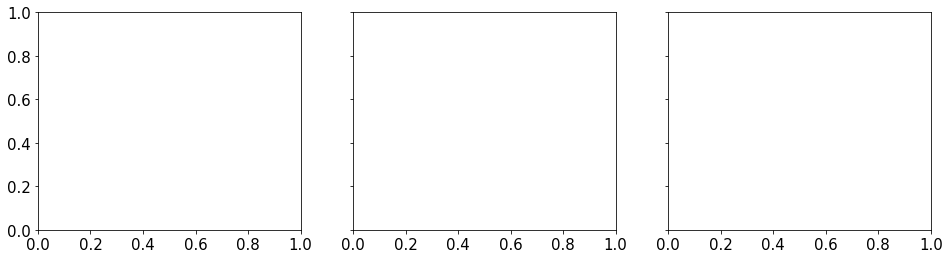

In [6]:
base_results_path = 'polyps/results - model trained on noisy labels - new 3'
noisy_type_map = {
    'uniform': 'independent',
    'nonuniform': 'dependent',
    'nonuniform2': 'non uniform'
}
def get_df_path(noise_type, noise_level, is_clean, alpha):
    num_trials = 1000
    num_lam = 1500
    num_cal = 500
    alpha_str = str(alpha).replace(".",'_')
    noise_level_str = str(noise_level).replace(".", "_")
    return f'{base_results_path}/{alpha_str}_{num_cal}_{num_lam}_{noise_level_str}_{noise_type}_{is_clean}_dataframe.csv'

for noise_level in np.arange(0.1, 1., 0.1):
    noise_level = np.round(noise_level, 3)
    fig, axes = plt.subplots(nrows=1, ncols = 3, sharey=True, figsize=(16,4))
    for ax, noise_type in zip(axes, ['uniform', 'nonuniform', 'nonuniform2']):
        total_df = pd.DataFrame()
        for alpha in list(np.arange(0.05, 0.3, 0.01)):
            alpha = np.round(alpha, 3)
            noisy_df = pd.read_csv(get_df_path(noise_type, noise_level, is_clean=False, alpha=alpha))
            noisy_df['noise_level'] = noise_level
            noisy_df['type'] = 'noisy'
            noisy_df['alpha'] = alpha
            clean_df = pd.read_csv(get_df_path(noise_type, noise_level, is_clean=True, alpha=alpha))
            clean_df['noise_level'] = noise_level
            clean_df['type'] = 'clean'
            clean_df['alpha'] = alpha

            total_df = pd.concat([total_df, noisy_df, clean_df])

#     fig, ax = plt.figure()
#     ax.set_title(f"{noise_type} noise")
        ax.set_title(f"{noisy_type_map[noise_type]} noise")
        sns.lineplot(data=total_df, x='alpha', y='risk', hue='type', ax=ax)
        lims = [
            np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
        ]
#         ax.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
        ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
        ax.set_xlabel("nominal level")
        # now plot both limits against eachother
    lines_labels = [axes[0].get_legend_handles_labels()]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    fig.legend(lines, labels, bbox_to_anchor=(0.9,.83), loc='upper left', ncol=1)
    [ax.legend().remove() for ax in axes]
    fig = plt.gcf()
    fig.suptitle(f"noise level={noise_level}", )#.set_y(0.95)
    fig.subplots_adjust(top=0.8)

    plt.show()


In [59]:
'a'.endswith('a')

True

# Transfer files

In [121]:
import os
import shutil

base = "coco/.cache"
dest_dir = 'coco/results'

for data_path in os.listdir(base):
    for experiment_path in os.listdir(os.path.join(base, data_path)):
        curr_path = os.path.join(base, data_path, experiment_path)
        for file in os.listdir(curr_path):
            if file.endswith('.csv'):
                shutil.copyfile(os.path.join(curr_path, file), os.path.join(dest_dir, file))


In [122]:
plt.rcParams.update({'font.size': 20})

# COCO

In [151]:
coco_noise_type_map = {
    'independent_even': 'independent even',
    'dependent_even': 'dependent even',
    'partial_even': 'partial even',    
}

coco_noise_type_map = {
    'independent_uneven': 'independent uneven',
    'dependent_uneven': 'dependent uneven',
    'partial_uneven': 'partial uneven',
}

param: risk


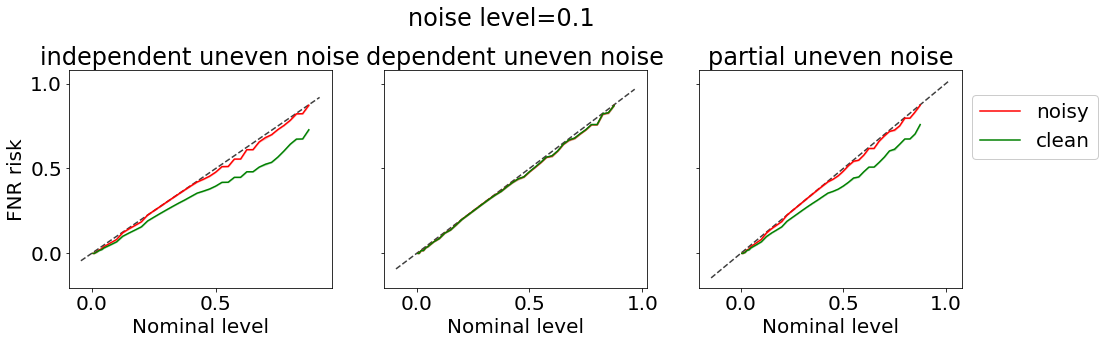

param: size


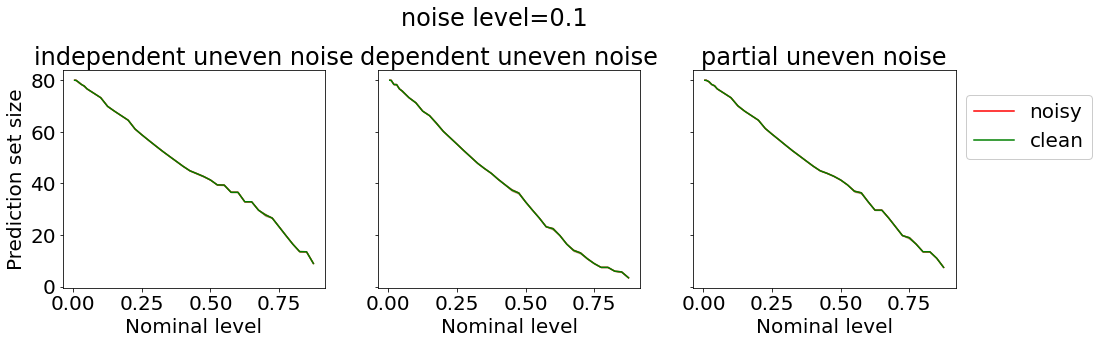

param: risk


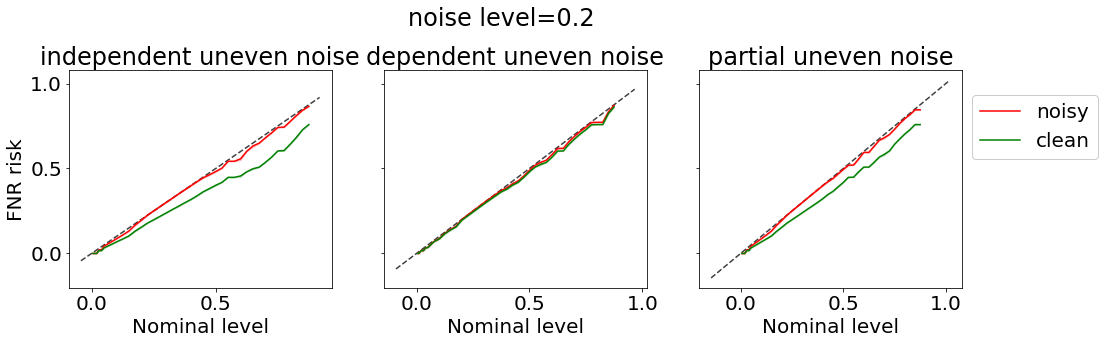

param: size


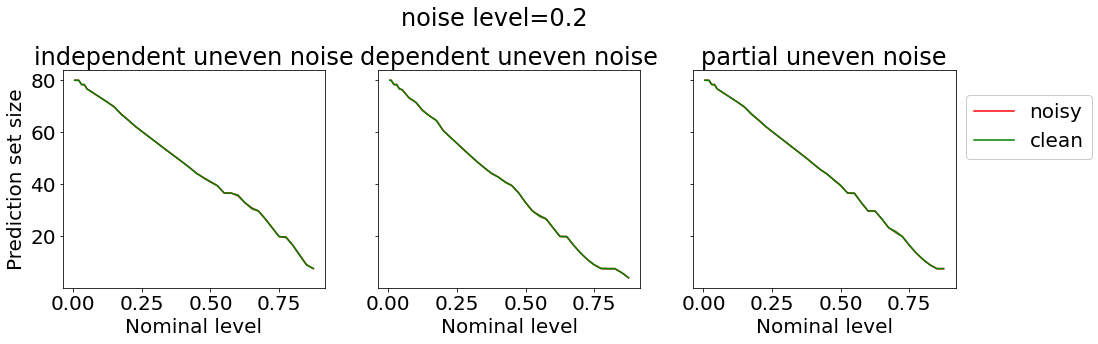

param: risk


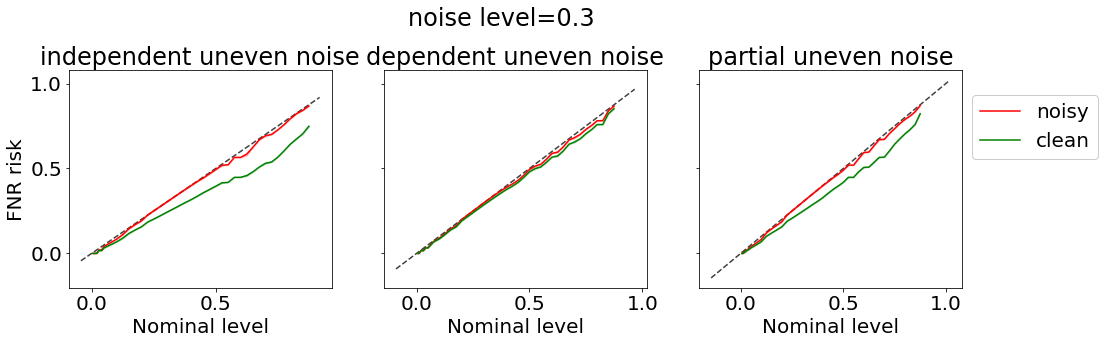

param: size


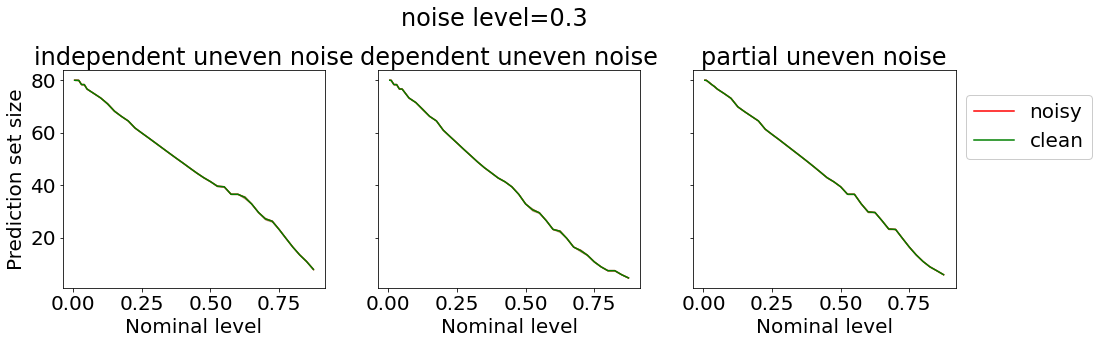

param: risk


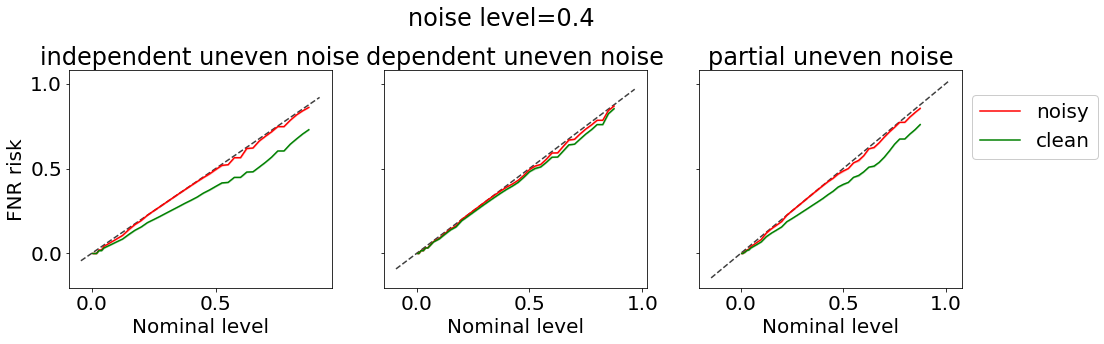

param: size


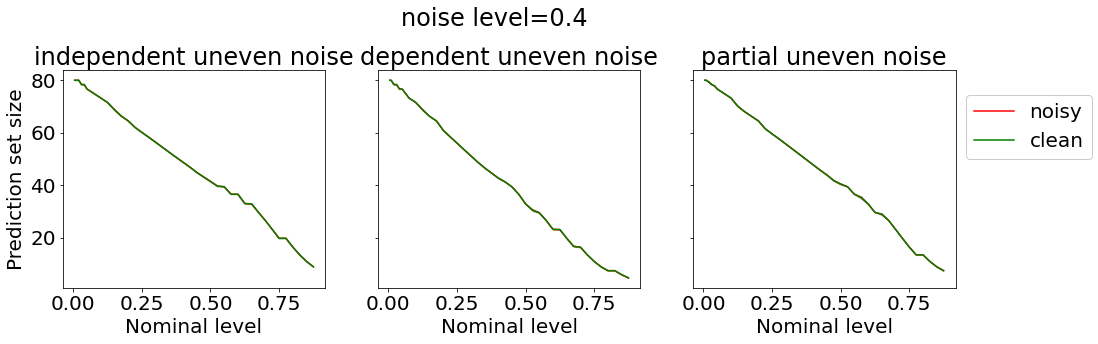

param: risk


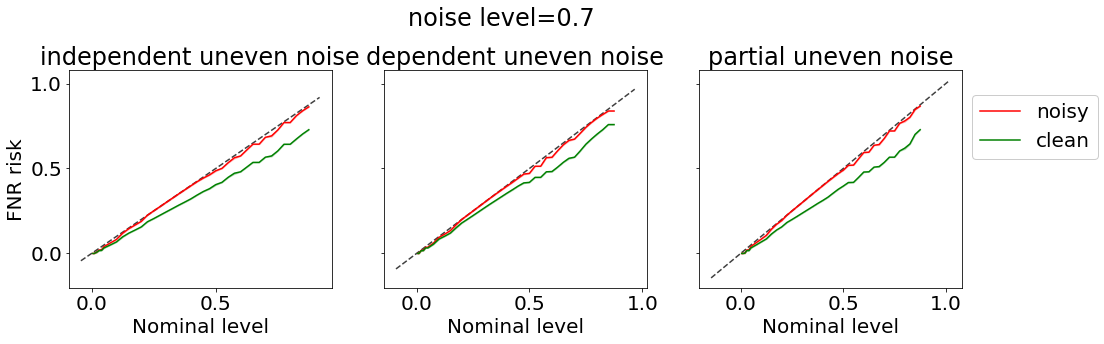

param: size


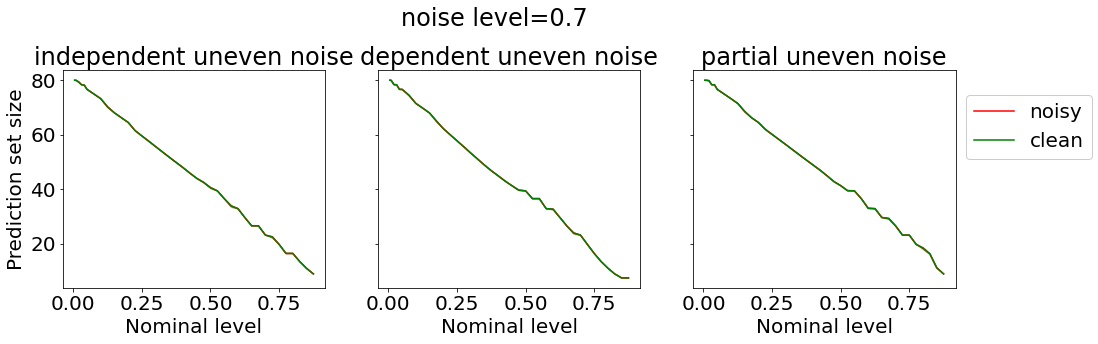

param: risk


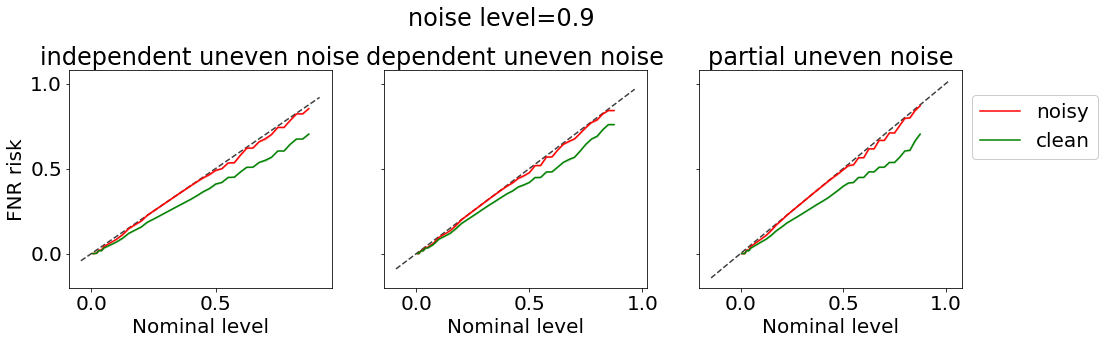

param: size


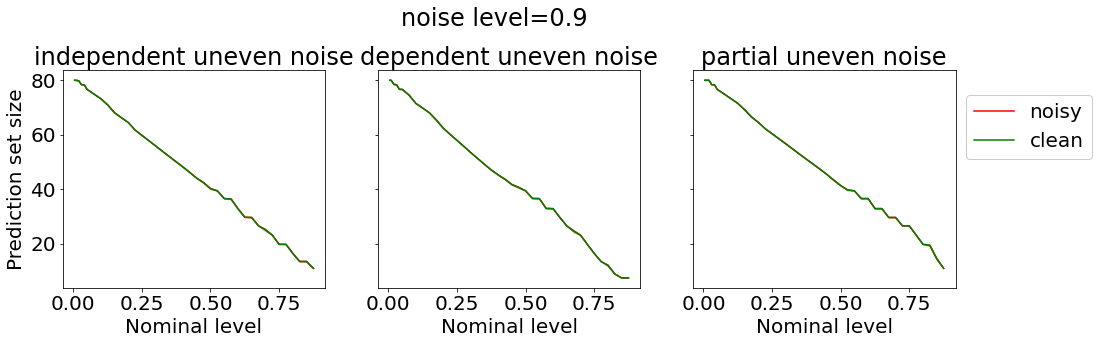

In [152]:
import copy
import traceback
base_results_path = 'coco/results'
noisy_type_map = coco_noise_type_map
def get_df_path(noise_type, noise_level, alpha):
    num_trials = 50
    num_lam = 1500
    num_cal = 10000
    model_trained_on_noisy = False
#     alpha_str = str(alpha).replace(".",'_')
#     noise_level_str = str(noise_level).replace(".", "_")
    "dependent_0.2_False_0.25_2000_1500_1000_dataframe"
    return f'{base_results_path}/{noise_type}_{noise_level}_{alpha}_{num_cal}_{num_lam}_{num_trials}_{model_trained_on_noisy}_dataframe.csv'
alphas =  [0.005, 0.01, 0.02, 0.03, 0.04] + list(np.arange(0.05, 0.9, 0.025))
alphas = np.array(alphas)
# alphas = alphas[alphas< 0.1]
for noise_level in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    noise_level = np.round(noise_level, 3)
    try:
        total_df = pd.DataFrame()
        for noise_type in list(noisy_type_map.keys()):
            for alpha in alphas:
                try:
                    alpha = np.round(alpha, 3)
                    df = pd.read_csv(get_df_path(noise_type, noise_level, alpha=alpha))
                    df = df[df['alpha'] == alpha]
                    noisy_df = pd.DataFrame()
                    noisy_df['risk'] = df['noisy risk']
                    noisy_df['noise_level'] = noise_level
                    noisy_df['type'] = 'noisy'
                    noisy_df['alpha'] = alpha
                    noisy_df['size'] = df['noisy size']
                    noisy_df['noise_type'] = noise_type
                    
                    clean_df =  pd.DataFrame()
                    clean_df['risk'] = df['clean risk']
                    clean_df['noise_level'] = noise_level
                    clean_df['type'] = 'clean'
                    clean_df['alpha'] = alpha
                    clean_df['size'] = df['clean size']
                    clean_df['noise_type'] = noise_type
                    
                    total_df = pd.concat([total_df, noisy_df, clean_df])
                except:
                    continue
        if len(total_df) == 0:
            continue
        for param in ['risk', 'size']:
            print(f"param: {param}")
            fig, axes = plt.subplots(nrows=1, ncols = 3, sharey=True, figsize=(16,4))
            for ax, noise_type in zip(axes, list(noisy_type_map.keys())):
                curr_df = total_df[total_df['noise_type'] == noise_type]
                
                ax.set_title(f"{noisy_type_map[noise_type]} noise")
                g= sns.lineplot(data=curr_df, x='alpha', y=param, hue='type', ax=ax, palette=['red', 'green'])
                if g is None or g.legend_ is  None:
                    print(f"found none len(curr_df): {len(curr_df)}")
                    continue
                g.legend_.set_title(None)
                ax.legend().remove()
                
                ax.set_xlabel("Nominal level") 

                if param == 'risk':
                    ax.set_ylabel("FNR risk")
                    
                    lims = [
                        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
                        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
                    ]
            #         ax.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
                    ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
                else:
                    ax.set_ylabel("Prediction set size")
                    
            fig.suptitle(f"noise level={noise_level}").set_y(1.1)
            lines_labels = [axes[0].get_legend_handles_labels()]
            lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
            fig.legend(lines, labels, bbox_to_anchor=(0.9,.83), loc='upper left', ncol=1)
            plt.show()

        
            

    except Exception as e:
        print("Error: ", e)
#         traceback.print_exc()
#         print()
        continue
